In [1]:
import pandas as pd
import numpy as np
import os
import pandas.io.sql as pd_sql
import psycopg2 as pg
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='C:/Users/anar.baylarov/Desktop/anar/Github/airlines/main'
os.chdir(path)
%ls

 Volume in drive C has no label.
 Volume Serial Number is B05C-7CB8

 Directory of C:\Users\anar.baylarov\Desktop\anar\Github\airlines\main

04/25/2020  06:04 PM    <DIR>          .
04/25/2020  06:04 PM    <DIR>          ..
04/25/2020  05:35 PM    <DIR>          .ipynb_checkpoints
04/25/2020  06:03 PM         4,437,676 25_04.ipynb
04/25/2020  05:35 PM         4,927,459 airline_overbook.ipynb
04/21/2020  09:06 PM    <DIR>          istdsa
               2 File(s)      9,365,135 bytes
               4 Dir(s)  167,438,917,632 bytes free


In [75]:
host='18.191.177.64'
connection_args = {
    'host': host,
    'dbname': 'airlines',
    'user': 'ubuntu',
    'port': 5432
}

In [77]:
connection = pg.connect(**connection_args)
query='select * from final_airlines_data;'
df_orj=pd_sql.read_sql(query, connection)
df_orj.sample(5,random_state=125)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,quarter,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,is_overbooked,distance_per_departures
207216,19.0,19.0,682442.0,2432,1776,944.0,0.0,1069.0,2801.0,2429.0,...,4,10,128,93,35,0.27,0.63,2,1,56.26
232507,136.0,132.0,6638320.0,25682,20568,12792.0,0.0,957.0,20030.0,17068.0,...,3,8,195,156,39,0.20,4.40,0,0,7.25
231018,100.0,85.0,4311200.0,16261,14297,4153.0,1713.0,874.0,11137.0,9109.0,...,2,4,191,168,23,0.12,2.83,0,0,10.28
182548,1.0,1.0,31280.0,118,113,0.0,2.0,2402.0,355.0,335.0,...,1,3,118,113,5,0.04,0.03,4,0,2402.00
406184,43.0,40.0,1437600.0,5688,4946,1234.0,15.0,957.0,5721.0,5020.0,...,3,9,142,124,18,0.13,1.33,1,1,23.93


In [78]:
df_orj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408739 entries, 0 to 408738
Data columns (total 28 columns):
departures_scheduled       408739 non-null float64
departures_performed       408739 non-null float64
payload                    408739 non-null float64
seats                      408739 non-null int64
passengers                 408739 non-null int64
freight                    408739 non-null float64
mail                       408739 non-null float64
distance                   408739 non-null float64
ramp_to_ramp               408739 non-null float64
air_time                   408739 non-null float64
unique_carrier             408739 non-null object
unique_carrier_name        408739 non-null object
origin_airport_id          408739 non-null int64
origin                     408739 non-null object
dest_airport_id            408739 non-null int64
dest                       408739 non-null object
aircraft_type              408739 non-null int64
year                       408739 no

In [79]:
df_1=df_orj[['departures_scheduled', 'departures_performed', 'seats',
       'passengers', 'distance', 'air_time',
       'unique_carrier', 'origin_airport_id',
       'dest_airport_id', 'aircraft_type', 'year', 'month',
       'seats_v1', 'passengers_v1', 'null_seats', 'null_seats_prop',
       'day_per_departures_perf', 'distance_grouped','distance_per_departures', 'is_overbooked']].copy()

In [80]:
# object veri tipindeki unique_carrrier`e encode uygulanarak kodlandı
df_1['unique_carrier']=df_1.unique_carrier.astype('category').cat.codes

In [81]:
df_1.groupby(['is_overbooked']).count()['seats']

is_overbooked
0    181578
1    227161
Name: seats, dtype: int64

In [82]:
df_1.describe()

,departures_scheduled,departures_performed,seats,passengers,distance,air_time,unique_carrier,origin_airport_id,dest_airport_id,aircraft_type,year,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,distance_per_departures,is_overbooked
count,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000
mean,32.874274,31.091344,4774.199978,4007.524026,1083.726194,4338.749026,1.346627,12646.142883,12638.905208,662.576696,2014.679916,6.414952,147.747587,121.364668,26.382919,0.172655,1.036063,1.541749,215.405735,0.555761
std,41.691919,40.031618,6372.744139,5492.098344,694.509135,6452.994326,0.653592,1513.496165,1515.013965,51.259718,2.544332,3.518836,43.497060,41.776160,22.154566,0.135669,1.334599,1.293322,409.493065,0.496882
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,10135.000000,10135.000000,359.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,504.000000,417.000000,546.000000,420.500000,1.000000,11292.000000,11292.000000,622.000000,2013.000000,3.000000,126.000000,102.000000,12.000000,0.080000,0.130000,0.000000,16.780000,0.000000
50%,23.000000,21.000000,3000.000000,2384.000000,948.000000,2176.000000,1.000000,12478.000000,12478.000000,655.000000,2015.000000,6.000000,150.000000,123.000000,21.000000,0.140000,0.700000,1.000000,47.190000,1.000000
75%,43.000000,40.000000,6169.000000,5180.000000,1517.000000,5747.000000,2.000000,13930.000000,13930.000000,694.000000,2017.000000,9.000000,166.000000,143.000000,34.000000,0.230000,1.330000,2.000000,195.500000,1.000000
max,533.000000,533.000000,94391.000000,85361.000000,5674.000000,180007.000000,2.000000,16218.000000,16218.000000,889.000000,2019.000000,12.000000,403.000000,402.000000,352.000000,1.000000,17.770000,4.000000,4962.000000,1.000000


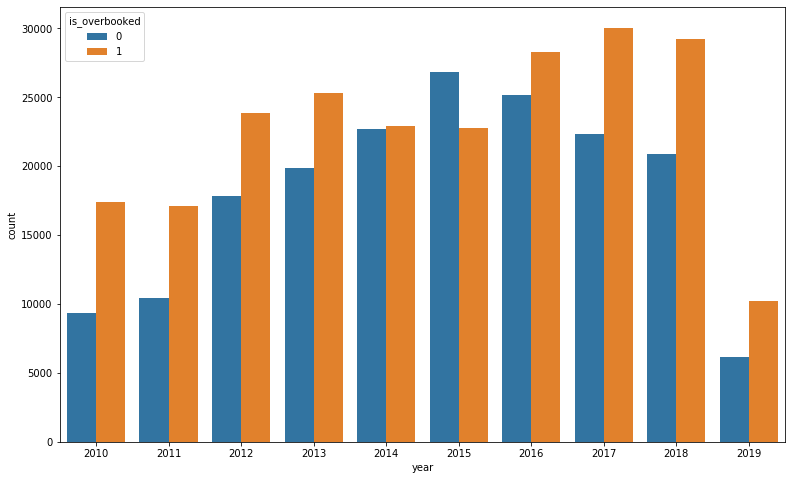

In [83]:
plt.figure(figsize=(13,8))
sns.countplot(data=df_1[['year','is_overbooked']],x='year',hue='is_overbooked')

In [84]:
# 2019un outlier değer olduğunu tespit ettik
flt_1=df_1['year']==2019
df_1[flt_1].groupby(['month']).count()['is_overbooked'].sort_values(ascending=False)

month
1    4449
3    4389
4    4104
2    3456
Name: is_overbooked, dtype: int64

In [134]:
flt_2=df_1['year']!=2019
df_2=df_1[flt_2].copy()
df_2.tail(3)

,departures_scheduled,departures_performed,seats,passengers,distance,air_time,unique_carrier,origin_airport_id,dest_airport_id,aircraft_type,year,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,distance_per_departures,is_overbooked
408736,79.0,79.0,7900,6345,427.0,5344.0,0,14492,12478,678,2011,11,100,80,20,0.20,2.63,0,5.41,1
408737,85.0,78.0,11097,8628,749.0,8841.0,1,14576,10397,655,2011,1,142,111,31,0.22,2.60,0,9.60,1
408738,0.0,0.0,0,0,746.0,0.0,1,10397,11618,655,2013,3,0,0,0,0.00,0.00,0,0.00,0


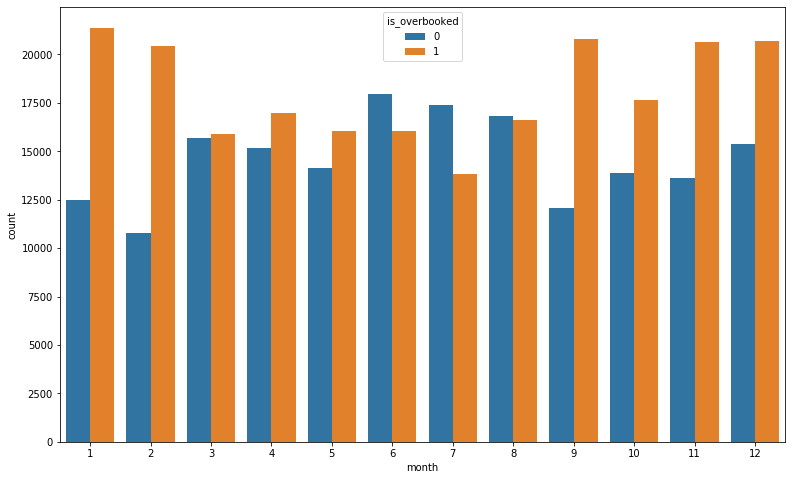

In [135]:
plt.figure(figsize=(13,8))
sns.countplot(data=df_2[['month','is_overbooked']],x='month',hue='is_overbooked')

In [136]:
df_2['unique_carrier'].value_counts()

1    178960
2    173797
0     39584
Name: unique_carrier, dtype: int64

In [137]:
'''
modellerimizi etkilemeyecek olan alanları belirleyerek verisetimizden çıkardık:
''' 
df_2.drop(['year','unique_carrier','air_time'],axis=1,inplace=True)
df_2.head(3)

,departures_scheduled,departures_performed,seats,passengers,distance,origin_airport_id,dest_airport_id,aircraft_type,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,distance_per_departures,is_overbooked
0,119.0,117.0,11700,9752,187.0,10721,12478,678,7,100,83,17,0.17,3.9,0,1.60,0
1,135.0,132.0,18834,13258,813.0,10423,10397,655,2,143,100,43,0.30,4.4,0,6.16,1
2,160.0,147.0,20915,15468,227.0,11057,10397,655,1,142,105,37,0.26,4.9,0,1.54,1


In [138]:
mapping={'seats_v1':'seats_per_departure',
        'passengers_v1':'passengers_per_departure',
        'null_seats':'empty_seats_per_departure',
        'null_seats_prop':'empty_seats_proportion',
        'day_per_departures_perf':'departures_per_day',
        'distance_per_departures':'distance_per_departure'}
df_2.rename(columns=mapping,inplace=True)
df_2.head(3)

,departures_scheduled,departures_performed,seats,passengers,distance,origin_airport_id,dest_airport_id,aircraft_type,month,seats_per_departure,passengers_per_departure,empty_seats_per_departure,empty_seats_proportion,departures_per_day,distance_grouped,distance_per_departure,is_overbooked
0,119.0,117.0,11700,9752,187.0,10721,12478,678,7,100,83,17,0.17,3.9,0,1.60,0
1,135.0,132.0,18834,13258,813.0,10423,10397,655,2,143,100,43,0.30,4.4,0,6.16,1
2,160.0,147.0,20915,15468,227.0,11057,10397,655,1,142,105,37,0.26,4.9,0,1.54,1


In [139]:
def calc_per(a,b):
    try:
        result=round(a/b,2)
    except ZeroDivisionError:
        result=0
    return(result)

In [140]:
# df_2['distance_per_departure']=calc_per(df_2.distance,df_2.departures_performed)
# df_2.distance_per_departure.replace([np.inf,-np.inf],np.nan,inplace=True)
# df_2[['distance','departures_performed','distance_per_departure']].head()

In [141]:
q_0=df_2['distance_per_departure'].quantile(0)
q_25=df_2['distance_per_departure'].quantile(.25)
q_50=df_2['distance_per_departure'].quantile(.5)
q_75=df_2['distance_per_departure'].quantile(.75)
q_100=df_2['distance_per_departure'].quantile(1)
print("The maximum,minimum and median values for Distance per departure are {},{} and {} respectively.".format(df_2.distance_per_departure.max(),df_2.distance_per_departure.min(),df_2.distance_per_departure.median()))
print("The quantile for Distance per departure in {}%,{}%,{}%,{}% and {}% are respectively {},{},{},{} and {}".format(0,25,50,75,100,q_0,q_25,q_50,q_75,q_100))

The maximum,minimum and median values for Distance per departure are 4962.0,0.0 and 46.96 respectively.
The quantile for Distance per departure in 0%,25%,50%,75% and 100% are respectively 0.0,16.7,46.96,194.0 and 4962.0


In [142]:
df_2.dropna(axis=0,inplace=True)
binInterval = [0.48, 18.91, 51, 206.8, 4962]
binLabels   = [1, 2, 3, 4]
df_2['dstPerDep_grouped'] = pd.cut(df_2['distance_per_departure'], bins = binInterval, labels=binLabels)
df_2[['dstPerDep_grouped','distance_per_departure']].head(100)

,dstPerDep_grouped,distance_per_departure
0,1,1.60
1,1,6.16
2,1,1.54
3,NaN,0.00
4,NaN,0.00
...,...,...
95,3,80.17
96,NaN,0.00
97,NaN,0.00
98,2,27.84


In [143]:
df_2.dropna(axis=0,inplace=True)
df_2.drop(['departures_scheduled','departures_performed','seats','passengers','distance','distance_grouped'],axis=1,inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377356 entries, 0 to 408737
Data columns (total 12 columns):
origin_airport_id            377356 non-null int64
dest_airport_id              377356 non-null int64
aircraft_type                377356 non-null int64
month                        377356 non-null int64
seats_per_departure          377356 non-null int64
passengers_per_departure     377356 non-null int64
empty_seats_per_departure    377356 non-null int64
empty_seats_proportion       377356 non-null float64
departures_per_day           377356 non-null float64
distance_per_departure       377356 non-null float64
is_overbooked                377356 non-null int64
dstPerDep_grouped            377356 non-null category
dtypes: category(1), float64(3), int64(8)
memory usage: 34.9 MB


In [144]:
df_2.head(5)

,origin_airport_id,dest_airport_id,aircraft_type,month,seats_per_departure,passengers_per_departure,empty_seats_per_departure,empty_seats_proportion,departures_per_day,distance_per_departure,is_overbooked,dstPerDep_grouped
0,10721,12478,678,7,100,83,17,0.17,3.90,1.60,0,1
1,10423,10397,655,2,143,100,43,0.30,4.40,6.16,1,1
2,11057,10397,655,1,142,105,37,0.26,4.90,1.54,1,1
5,10423,10721,694,6,150,128,22,0.15,0.67,84.90,1,3
6,10785,12478,694,7,150,132,18,0.12,1.00,8.87,0,1


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

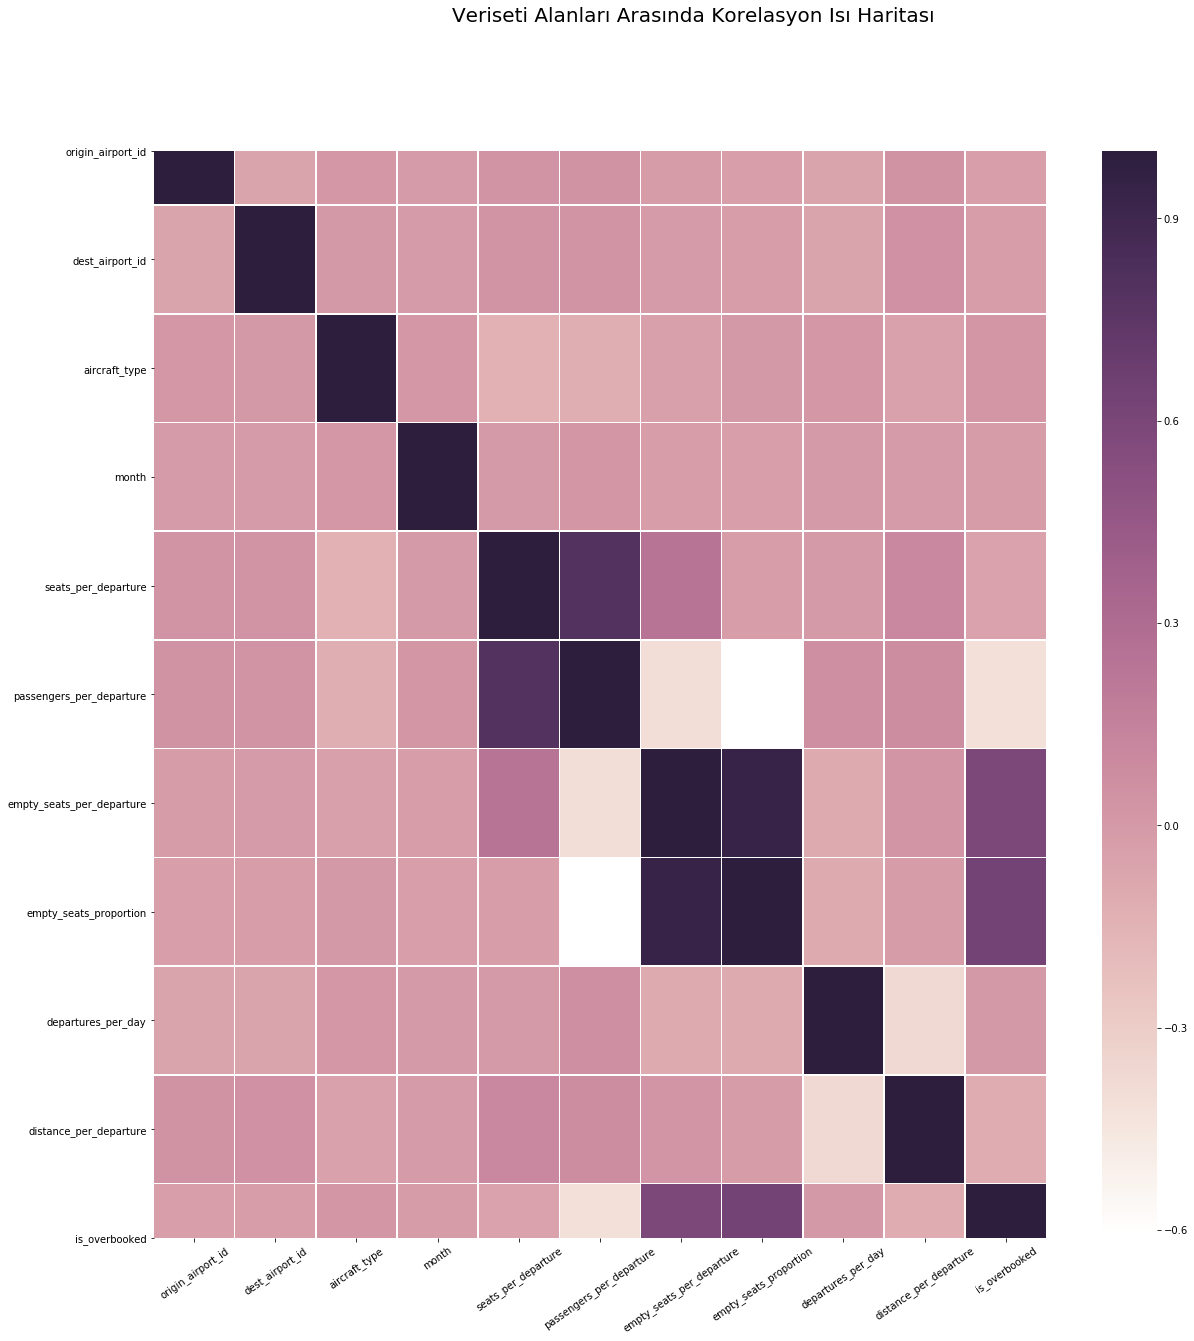

In [147]:
plt.figure(figsize=(20,20))
plt.suptitle('Veriseti Alanları Arasında Korelasyon Isı Haritası',fontsize=(20))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df_2.corr(),linewidths=.5,cmap=cmap,fmt="d")
plt.xticks(rotation=35)
plt.yticks(rotation=0)

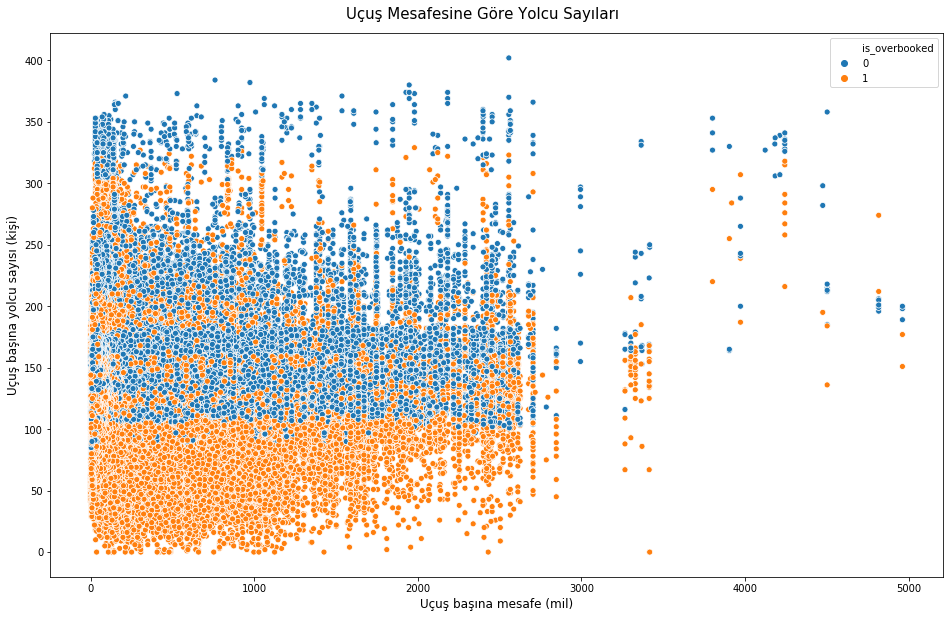

In [148]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='distance_per_departure', y='passengers_per_departure', data=df_2,hue='is_overbooked')
plt.figtext(.5,.9,'Uçuş Mesafesine Göre Yolcu Sayıları', fontsize=15, ha='center')
plt.xlabel('Uçuş başına mesafe (mil)',fontsize=12)
plt.ylabel('Uçuş başına yolcu sayısı (kişi)',fontsize=12)
plt.show()

In [209]:
# df_3=df_2[[ "is_overbooked" , "origin_airport_id", "dest_airport_id" , "aircraft_type", "month" , "seats_per_departure" , "passengers_per_departure" , "empty_seats_per_departure" , "empty_seats_proportion" , "departures_per_day"  , "distance_per_departure","dstPerDep_grouped"]].copy()
df_3=df_2[[ "is_overbooked" , "aircraft_type", "month" , "seats_per_departure" , "departures_per_day"  , "dstPerDep_grouped"]].copy()
df_3.tail(5)

,is_overbooked,aircraft_type,month,seats_per_departure,departures_per_day,dstPerDep_grouped
408732,1,694,8,150,1.93,1
408734,0,678,6,100,2.30,1
408735,1,694,6,150,2.50,1
408736,1,678,11,100,2.63,1
408737,1,655,1,142,2.60,1


In [210]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377356 entries, 0 to 408737
Data columns (total 6 columns):
is_overbooked          377356 non-null int64
aircraft_type          377356 non-null int64
month                  377356 non-null int64
seats_per_departure    377356 non-null int64
departures_per_day     377356 non-null float64
dstPerDep_grouped      377356 non-null category
dtypes: category(1), float64(1), int64(4)
memory usage: 17.6 MB


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df_3.iloc[:, 1:], df_3.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)
y_train.head(5)

155606    0
164049    0
304060    1
381423    0
1795      1
Name: is_overbooked, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


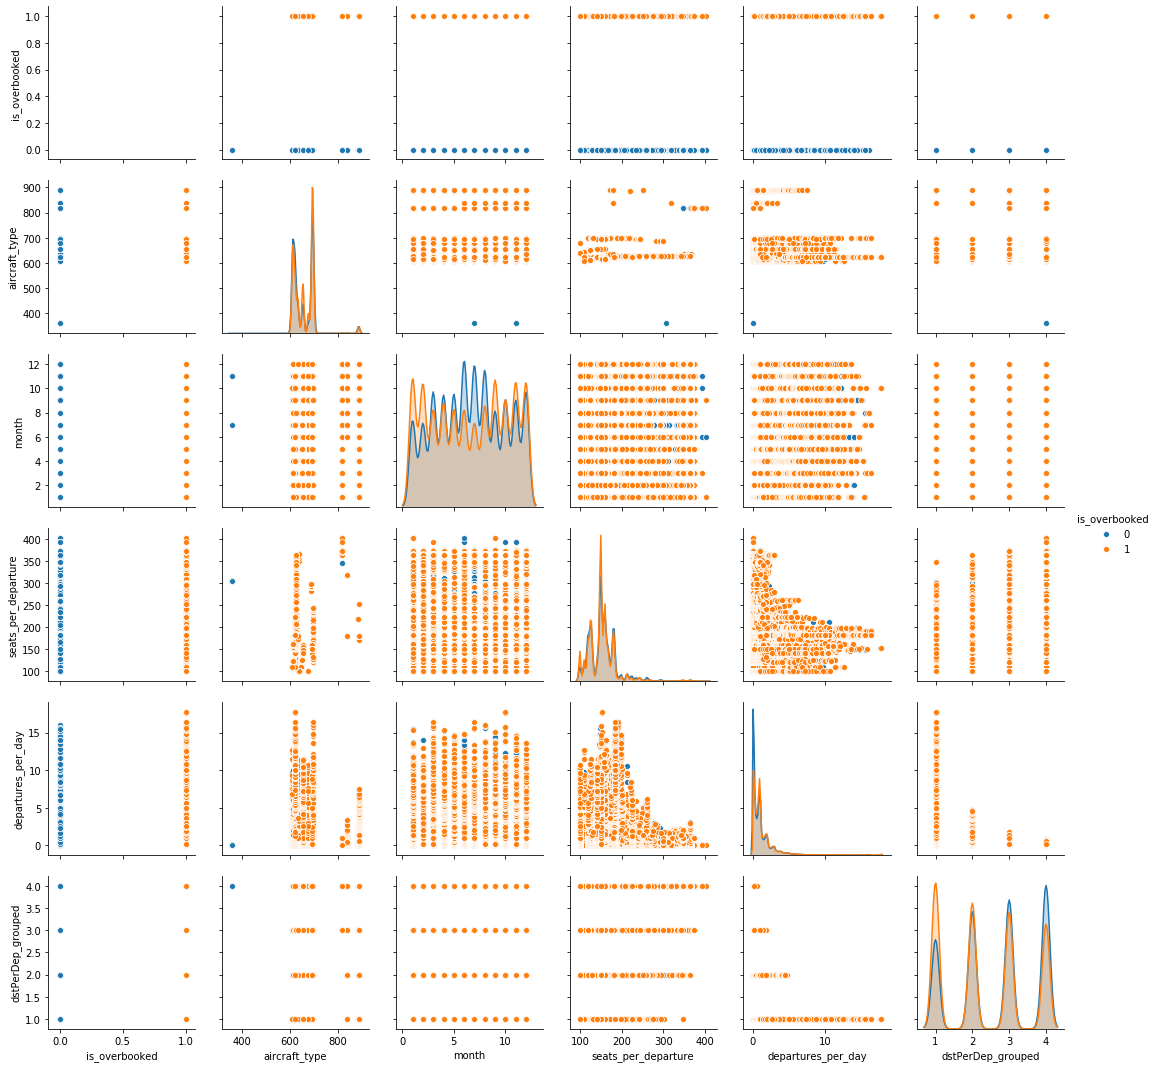

In [212]:
sns.pairplot(df_3, hue='is_overbooked');

In [213]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
%matplotlib inline

nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.5804801780792876

In [214]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.5753524485902056

In [215]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.5594790120839517

In [160]:
print(rand.best_params_)

NameError: name 'rand' is not defined

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [217]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [218]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6077883188467246


In [219]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [220]:
Y_pred = linear_svc.predict(X_test)
linear_svc.score(X_test, y_test)

0.5752199491202035

In [221]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=5 , max_depth=1)
decision_tree.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [222]:
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test, y_test)

0.5753524485902056

In [223]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=2, oob_score = False)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.7195346556955652

In [264]:
#boosting
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
start=time()
seed = 7
num_trees = 2
kfold = model_selection.KFold(n_splits=220, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())
print("Voting Classifier took %.2f seconds."% (time() - start))

0.5746708510212383


In [269]:
model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2,
                           n_iter_no_change=None, presort='auto',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

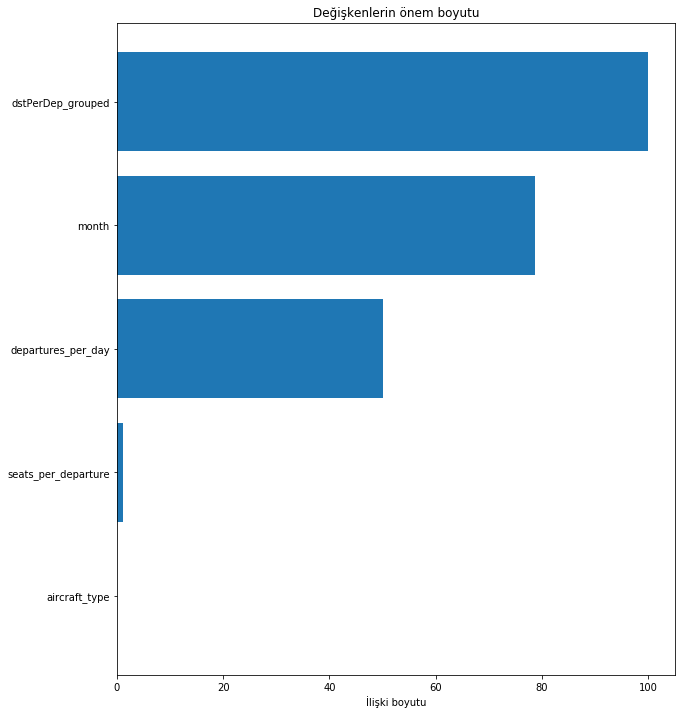

In [272]:
#importance of features ,scaling over 100 
col_imp = model.feature_importances_
df_col = pd.DataFrame(col_imp)
df_col.columns = ['Importance']
df_col.index = X_train.columns
col_imp = 100.0 * (col_imp / col_imp.max())
sorted_col = np.argsort(col_imp)
pos = np.arange(sorted_col.shape[0]) + .5

plt.figure(figsize=(10,12))
plt.barh(pos, col_imp[sorted_col], align='center')
plt.yticks(pos, X_train.columns[sorted_col])
plt.xlabel('İlişki boyutu')
plt.title('Değişkenlerin önem boyutu')
plt.show()

In [226]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 8
kfold = model_selection.KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6040101414575213


In [227]:
# for voting=hard (mean)
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

In [228]:
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.5960488658045368

In [229]:
# for voting=soft (max)
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', n_jobs=-1)
voting_classifer.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

In [230]:
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.6269212423150308

In [232]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(voting_classifer, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 52313,  76087],
       [ 38761, 134723]], dtype=int64)

In [274]:
cf_matrix=confusion_matrix(y_train, predictions)
df_cf=pd.DataFrame(cf_matrix,columns=['Neg','Pos'],index=['False','True'])
df_cf

,Neg,Pos
False,52313,76087
True,38761,134723


In [243]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7011454771607155

In [244]:
from sklearn.metrics import roc_auc_score

y_scores = voting_classifer.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8145853361305424


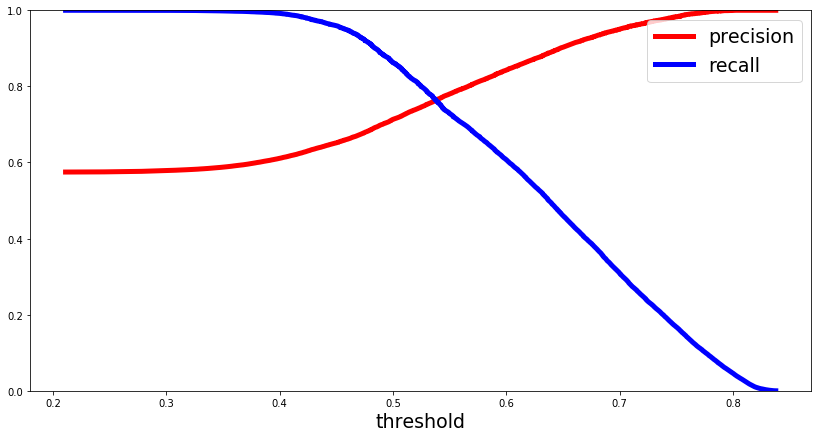

In [245]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = voting_classifer.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [246]:
y_predict = voting_classifer.predict(X_train)  # This is a hard classifier
voting_classifer.score(X_train, y_train)

0.7218335519603556

In [247]:
#test

voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
voting_classifer.fit(X_train, y_train)
voting_classifer.score(X_test,y_test)

0.5960488658045368

In [248]:
#CV for accuracy
from sklearn.model_selection import cross_val_score
voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
scores = cross_val_score(voting_classifer, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.59342807 0.58829375 0.59150684 0.59034748 0.594309   0.59782033
 0.5953359  0.59579966 0.59242083 0.59165894]
Mean: 0.5930920777257951
Standard Deviation: 0.0026812317418561725


In [249]:
#CV for recall
from sklearn.model_selection import cross_val_score
voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
scores = cross_val_score(voting_classifer, X_train, y_train, cv=10, scoring = "recall")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8307107  0.80921091 0.82344804 0.81122831 0.81807701 0.82297671
 0.83116209 0.82810699 0.81381139 0.82580125]
Mean: 0.821453339878029
Standard Deviation: 0.007574039993267279


In [250]:
#CV for precision
from time import time
start = time()
from sklearn.model_selection import cross_val_score
voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
scores = cross_val_score(voting_classifer, X_train, y_train, cv=10, scoring = "precision")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print("Voting Classifier took %.2f seconds."% (time() - start))

Scores: [0.6068466  0.60622679 0.60649544 0.60752827 0.60954344 0.61151326
 0.60824264 0.60909014 0.60874439 0.60623757]
Mean: 0.6080468545714643
Standard Deviation: 0.0016300806871467584
Voting Classifier took 361.82 seconds.


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

A_train, A_test, B_train, B_test = train_test_split(df_3.iloc[:, 1:], df_3.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [252]:
nb = MultinomialNB()
nb.fit(A_train, B_train)
nb.score(A_test, B_test)

0.5594790120839517

In [253]:
Y_pred = decision_tree.predict(A_test)
decision_tree.score(A_test, B_test)

0.5753524485902056

In [254]:
from sklearn.ensemble import AdaBoostClassifier
start=time()
seed = 7
num_trees = 8
kfold = model_selection.KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, A_train, B_train, cv=kfold)
print(results.mean())

print("AdaBoost Classifier took %.2f seconds."% (time() - start))

0.6040101414575213
AdaBoost Classifier took 38.24 seconds.


In [255]:
# for voting=hard (mean)
from sklearn.ensemble import VotingClassifier
start=time()
clf11 = LogisticRegression(random_state=1)
clf22 = RandomForestClassifier(n_estimators=50, random_state=1)
clf33 = GaussianNB()

voting_classifer = VotingClassifier(estimators=[('lr', clf11), ('rf', clf22), ('gnb', clf33)], voting='hard', n_jobs=-1)
voting_classifer.fit(A_train, B_train)
print("Voting Classifier took %.2f seconds."% (time() - start))

Voting Classifier took 38.98 seconds.


In [256]:
from sklearn.model_selection import cross_val_score
voting_classifer = VotingClassifier(estimators=[('lr', clf11), ('rf', clf22), ('gnb', clf33)], voting='hard', n_jobs=-1)
scores = cross_val_score(voting_classifer, A_train, B_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.59342807 0.58829375 0.59150684 0.59034748 0.594309   0.59782033
 0.5953359  0.59579966 0.59242083 0.59165894]
Mean: 0.5930920777257951
Standard Deviation: 0.0026812317418561725


In [257]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=5 , max_depth=1)
decision_tree.fit(A_train, B_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [259]:
A_pred = decision_tree.predict(A_test)
decision_tree.score(A_test, B_test)

0.5753524485902056